# EDA on trnsact data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Read in data

In [9]:
#read in trnsact data
df = pd.read_csv("trnsact_sample.csv",header=None)

In [10]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3964124,209,960,4400,0,2005-05-28,P,1,58.5,39.99,39.99,973600026,333,0
1,3964124,304,310,500,904751,2004-12-23,P,1,58.5,58.50,58.50,871400074,333,0
2,3964124,404,430,500,636406519,2005-06-04,P,1,58.5,39.99,39.99,74800024,333,0
3,3964124,409,510,3800,810908758,2005-08-12,P,1,58.5,29.25,29.25,659800024,333,0
4,3964124,507,70,600,290508369,2005-08-26,P,1,58.5,20.47,20.47,303500032,333,0


In [11]:
#rename columns
df.columns = ['SKU', 'STORE', 'REGISTER', 'TRANNUM', 'INTERID', 'SALEDATE',
              'STYPE', 'QUANTITY', 'ORGPRICE', 'AMT', 'AMT2', 'SEQ', 'MIC','UNKNOWN']

## Quantity per transaction distribution

In [23]:
#find the distribution of quantities per transaction
df["QUANTITY"].value_counts()

1     12095116
70           1
10           1
Name: QUANTITY, dtype: int64

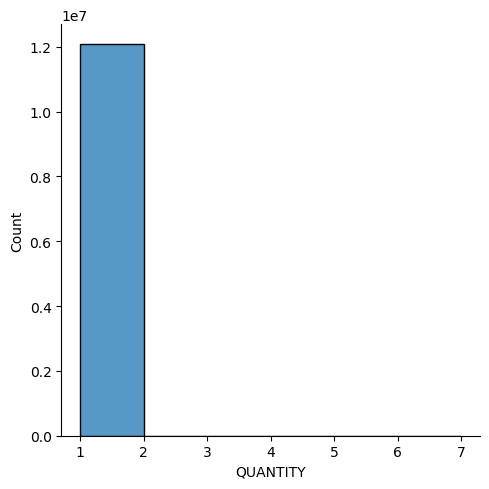

In [21]:
#plot the distribution of quantities per transaction
sns.displot(df, x="QUANTITY", bins=[1, 2, 3, 4, 5, 6, 7])

- In most transactions, 1 or 2 items are sold.

## Most frequent Original price of the item stock (orgprice)

In [38]:
#find the price that most customers accept
df.ORGPRICE.value_counts().iloc[:15]

20.0    456985
6.0     439985
39.0    334936
18.0    302393
49.0    294331
29.0    276559
24.0    252375
13.5    244193
34.0    232870
22.0    225318
10.0    224522
8.0     216885
17.5    215441
35.0    214415
25.0    211758
Name: ORGPRICE, dtype: int64

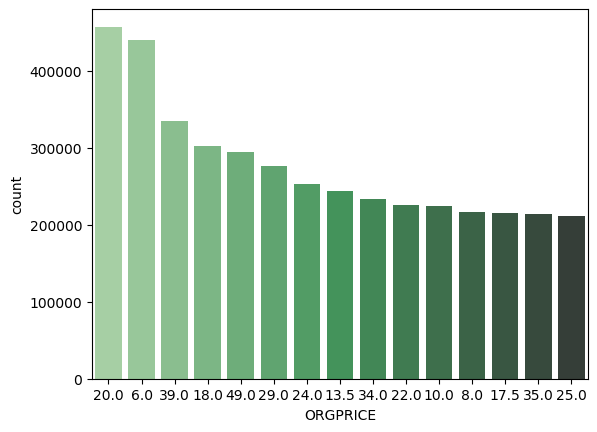

In [37]:
#top 15 most frequent ORGPRICE
sns.countplot(x=df["ORGPRICE"], palette="Greens_d",order=df.ORGPRICE.value_counts().iloc[:15].index)

- Most frequent prices are 20, 6, 39, 18

## Return rate over store

In [39]:
#number of stores
df["STORE"].nunique()

329

In [66]:
df["returned"] = (df["STYPE"].str.strip() == "R").astype(int)

In [67]:
df["returned"].mean()

0.07657188627676059

In [78]:
#Find the top 10 purchase rate stores
return_rate = df.groupby('STORE')['returned'].mean().to_frame()
return_rate.sort_values(by = "returned").iloc[:10]

,returned
STORE,
1804,0.021443
1704,0.036140
2407,0.037323
9806,0.042292
4109,0.051632
1609,0.053199
2309,0.053418
7004,0.056203
9909,0.057224


In [81]:
#Find the top 10 return rate stores
return_rate.sort_values(by = "returned", ascending=False).iloc[:10]

,returned
STORE,
203,0.101324
6002,0.101289
503,0.100854
1807,0.099792
403,0.099418
7103,0.098990
6402,0.097973
6503,0.096169
5002,0.095509


In [99]:
return_rate.shape

(329, 1)

## Distribution of return rates

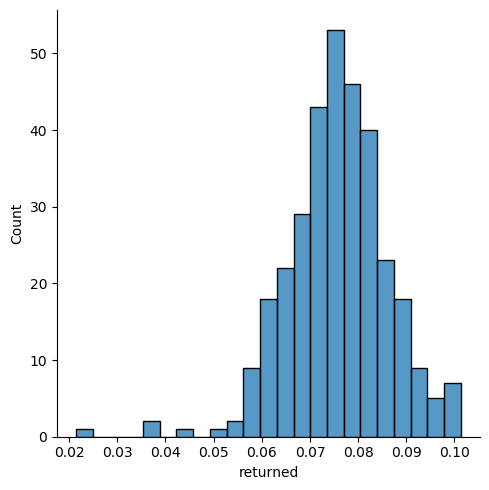

In [83]:
#plot the distribution of return rates
sns.displot(return_rate, x="returned")

- The most frequent return rate is 0.07-0.09,the distribution of return rates

## Return rate by State

In [84]:
#join stores with return rates table
strinfo = pd.read_csv("strinfo.csv", sep = "delimieter", header = None)
strinfo = strinfo[0].str.split(",", expand = True)
#rename columns
strinfo.rename(columns = {0: "STORE", 1: "CITY",2:"STATE",3:"ZIP",4:"unknown"}, inplace = True)
strinfo.drop(["unknown"],axis=1,inplace=True)
strinfo.head()

/Users/wangyifei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281


In [94]:
strinfo["STORE"] = strinfo["STORE"].astype("int")

In [101]:
#show the state and city of each store and the return rate
new_df = strinfo.join(return_rate, on='STORE',how='inner')
new_df

,STORE,CITY,STATE,ZIP,returned
10,102,TAMPA,FL,33607,0.073651
11,103,ST LOUIS,MO,63117,0.082888
13,107,HURST,TX,76053,0.081218
17,202,TAMPA,FL,33612,0.080732
18,203,CHESTERFIELD,MO,63017,0.101324
...,...,...,...,...,...
441,9704,SHAWNEE,OK,74804,0.064565
444,9709,GREELEY,CO,80631,0.066509
446,9804,LAWTON,OK,73501,0.071326
447,9806,MABELVALE,AR,72103,0.042292


## top 10 purchase rate stores

In [115]:
#Find the top 10 purchase rate stores
returned_state = new_df.groupby('STATE')['returned'].mean().to_frame()
returned_state = returned_state.sort_values(by = "returned", ascending=False).reset_index()
returned_state

,STATE,returned
0,IL,0.088112
1,OH,0.085450
2,MO,0.085267
3,GA,0.084881
4,NE,0.081337
5,KY,0.078635
6,UT,0.078601
7,AL,0.078357
8,LA,0.078154
9,IA,0.077642


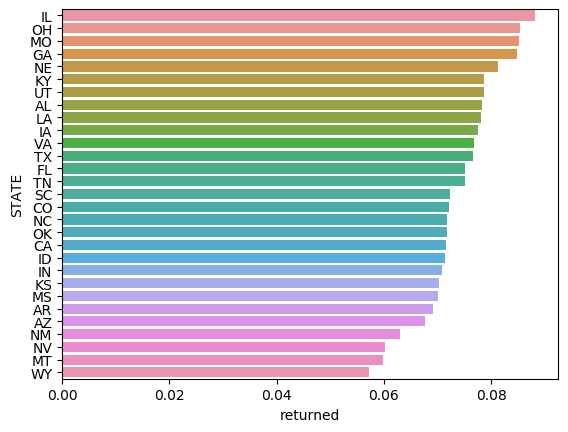

In [117]:
sns.barplot(data=returned_state, x="returned", y="STATE")

- We could find that stores in Illinois has the highest return rate, while the stores in WY has the lowest return rate

In [104]:
#Find the top 10 purchase rate stores
returned_city = new_df.groupby('CITY')['returned'].mean().to_frame()
returned_city.sort_values(by = "returned", ascending=False)

,returned
CITY,
CHESTERFIELD,0.101324
ALPHARETTA,0.101289
FLORISSANT,0.099418
AKRON,0.098990
ATLANTA,0.097973
...,...
NORFOLK,0.056203
FARMINGTON,0.053418
FLAGSTAFF,0.053199


- We could find that stores in Chesterfield has the highest return rate, while the stores in Jackson has the lowest return rate

## Summary of findings:
- In most transactions, 1 or 2 items are sold.
- Most frequent prices are 20, 6, 39, 18
- The most frequent return rate is 0.07-0.09, return rate is almost normally distributed
- For return rates by states, Stores in Illinois has the highest return rate, while the stores in WY has the lowest return rate
- For return rates by cities, Stores in Chesterfield has the highest return rate, while the stores in Jackson has the lowest return rate